In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv
from scipy.optimize import fsolve
import scipy


In [2]:
import matplotlib.colors as mcolors

In [3]:
kappa = 0.6
alpha = .3
ka = kappa*alpha

In [4]:
matrix = np.zeros((4,4))

In [5]:
matrix[0,0] = 2*iv(1, kappa*alpha) - kappa*alpha*iv(0, kappa*alpha)
matrix[0,1] = -2*kappa*iv(1,kappa*alpha)
matrix[0,2] = -2*kv(1, kappa*alpha)-kappa*alpha*kv(0, kappa*alpha)
matrix[0,3] = 2*kappa*kv(1,kappa*alpha)

In [6]:
matrix[1,0] = alpha*iv(1, ka)

In [7]:
def build_matrix(kappa, alpha, Lambda):
    ka = kappa*alpha
    matrix = np.zeros((5,5))
    
    #first row
    matrix[0,0] = 2*iv(1, kappa*alpha) - kappa*alpha*iv(0, kappa*alpha)
    matrix[0,1] = -2*kappa*iv(1,kappa*alpha)
    matrix[0,2] = -2*kv(1, kappa*alpha)-kappa*alpha*kv(0, kappa*alpha)
    matrix[0,3] = 2*kappa*kv(1,kappa*alpha)
    matrix[0,4] = 0
    
    # second row
    matrix[1,0] = alpha*iv(1, ka)
    matrix[1,1] = 2*iv(0, ka)
    matrix[1,2] = -alpha*kv(1,ka)
    matrix[1,3] = 2*kv(0, ka)
    matrix[1,4] = 0
    
    #third row
    
    #matrix[2,4] = kappa*(4*Lambda+s)
    
    return matrix

matrix

In [8]:
import scipy


In [9]:
import sympy as sp
from sympy.functions.special.bessel import besseli, besselk, besselj, bessely
from scipy.special import jv,kv,iv,yv
kappa, r, alpha,Lambda,Bo, Ca, D = sp.symbols('kappa, r, alpha,Lambda, Bo, Ca,D')
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
               -sp.I*r*besseli(1,kappa*r)/kappa, 
               -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
               sp.I*r*besselk(1, kappa*r)/kappa
              ])#*kappa**2/sp.I/r*2
v = sp.simplify(v)
w_0 = 1/4*(sp.log(r/alpha)-(r**2-alpha**2))


In [10]:
v

Matrix([
[I*r*(-kappa*r*besseli(0, kappa*r) + 2*besseli(1, kappa*r))/(2*kappa**2)],
[                                         -I*r*besseli(1, kappa*r)/kappa],
[-I*r*(kappa*r*besselk(0, kappa*r) + 2*besselk(1, kappa*r))/(2*kappa**2)],
[                                          I*r*besselk(1, kappa*r)/kappa]])

# This cell generates the actual matrix correctly?

In [11]:
#idea: once alpha and Lambda and kappa have been specificied, evaluate 
# i.e first bc is v dot a =0
Bo = 0.1; Ca =0.1; D = 1
matrix_sym = sp.Matrix()
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                       -sp.I*r*besseli(1,kappa*r)/kappa, 
                       -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                       sp.I*r*besselk(1, kappa*r)/kappa
                      ])#*kappa**2/sp.I/r*2

v = sp.simplify(v)
u = 1/r*v*sp.I*kappa; w = -1/r*v.diff(r)
w_0 = 1/4*(sp.log(r/alpha)-(r**2-alpha**2))

expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])
#kinematic_bc
expr_S = sp.simplify(sp.I*kappa*u+w.diff(r))
expr_kinematic = sp.simplify((Lambda+w_0*sp.I*kappa)*expr_S-u)

expr_normal = sp.simplify(Bo*expr_p - 2*Ca*u.diff(r) + (D-kappa**2)*expr_S)

matrix_sym=matrix_sym.row_insert(0,sp.simplify(u.subs(r,alpha)).T)
matrix_sym=matrix_sym.row_insert(1,sp.simplify(w.subs(r,alpha)).T)

#kinematic_bc
matrix_sym = matrix_sym.row_insert(2,expr_kinematic.subs(r,1).T)
matrix_sym = matrix_sym.row_insert(3,expr_normal.subs(r,1).T)
matrix_sym

Matrix([
[                                                                                                                                                   alpha*besseli(0, alpha*kappa)/2 - besseli(1, alpha*kappa)/kappa,                                                                                                 besseli(1, alpha*kappa),                                                                                                                                                    alpha*besselk(0, alpha*kappa)/2 + besselk(1, alpha*kappa)/kappa,                                                                                               -besselk(1, alpha*kappa)],
[                                                                                                                                                                                 I*alpha*besseli(1, alpha*kappa)/2,                                                                                               I*besseli(0, alph

In [12]:
#idea: once alpha and Lambda and kappa have been specificied, evaluate 
# i.e first bc is v dot a =0
Bo = 0.1; Ca =0.1; D = 1
matrix_sym = sp.Matrix()
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                       -sp.I*r*besseli(1,kappa*r)/kappa, 
                       -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                       sp.I*r*besselk(1, kappa*r)/kappa
                      ])#*kappa**2/sp.I/r*2

v = sp.simplify(v)
u = 1/r*v*sp.I*kappa; w = -1/r*v.diff(r)
w_0 = 1/4*(sp.log(r/alpha)-(r**2-alpha**2))
expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])
#kinematic_bc
expr_S = sp.simplify(-kappa**2*v+v.diff(r)-v.diff(r).diff(r))
expr_kinematic = (Lambda+w_0*sp.I*kappa)*expr_S+kappa**2*v

expr_normal = sp.simplify(Bo*expr_p - 2*Ca*sp.I*kappa*(v/r).diff(r) + (D-kappa**2)*expr_S)

matrix_sym=matrix_sym.row_insert(0,sp.simplify(v.subs(r,alpha)).T)
matrix_sym=matrix_sym.row_insert(1,sp.simplify(v.diff(r).subs(r,alpha)).T)

#kinematic_bc
matrix_sym = matrix_sym.row_insert(2,expr_kinematic.subs(r,1).T)
matrix_sym = matrix_sym.row_insert(3,expr_normal.subs(r,1).T)
matrix_sym

Matrix([
[                                                                                                                       I*alpha*(-alpha*kappa*besseli(0, alpha*kappa) + 2*besseli(1, alpha*kappa))/(2*kappa**2),                                                                                -I*alpha*besseli(1, alpha*kappa)/kappa,                                                                                                                        -I*alpha*(alpha*kappa*besselk(0, alpha*kappa) + 2*besselk(1, alpha*kappa))/(2*kappa**2),                                                                                  I*alpha*besselk(1, alpha*kappa)/kappa],
[                                                                                                                                                                         -I*alpha**2*besseli(1, alpha*kappa)/2,                                                                                      -I*alpha*besseli(0, alpha*kappa),       

In [13]:
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
f_test = sp.lambdify([Lambda], matrix_sym.subs(kappa, 1).subs(alpha,0.1).det(), modules=libraries)

/Users/javier/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


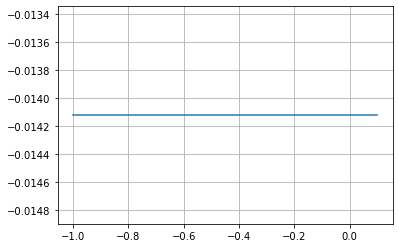

In [120]:
plt.plot(epsilon*np.linspace(-10, 1, 100), f_test(np.linspace(-10, 1, 100)))
plt.grid()

In [121]:
## this seems to work, let's code it into a function

In [15]:
kappa_ = 0.25; alpha_ = 0.1
Bo_ = 0.1; Ca_ =0.1; D_ =0
def build_matrix(Lambda_):
    import sympy as sp
    from sympy.functions.special.bessel import besseli, besselk, besselj, bessely
    from scipy.special import jv,kv,iv,yv
    kappa, r, alpha,Lambda,Bo, Ca, D = sp.symbols('kappa, r, alpha,Lambda, Bo, Ca,D')
    v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                   -sp.I*r*besseli(1,kappa*r)/kappa, 
                   -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                   sp.I*r*besselk(1, kappa*r)/kappa
                  ])#*kappa**2/sp.I/r*2
    v = sp.simplify(v)
    w_0 = 1/4*(sp.log(r/alpha)-(r**2-alpha**2))
    matrix_sp = np.zeros((4,4), dtype='complex')
    bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
    libraries = [bessel, "numpy"] 
    matrix_sp[0,:] = sp.lambdify([kappa, alpha, Lambda, r], v, modules=libraries)(kappa_, alpha_, Lambda_, alpha_).T
    matrix_sp[1,:] = sp.lambdify([kappa, alpha, Lambda, r], 
                                 v.diff(r), modules=libraries)(kappa_, alpha_, Lambda_, alpha_).T
    #kinematic_bc
    expr_S = -kappa**2*v+v.diff(r)-v.diff(r).diff(r)
    expr_kinematic = (Lambda+w_0.subs(r,1)*sp.I*kappa)*expr_S+kappa**2*v
    expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])
    expr_normal = Bo*expr_p -2*Ca*sp.I*kappa*v+(D-kappa**2)*expr_S
    matrix_sp[2,:] = sp.lambdify([kappa, alpha,Lambda, r], expr_kinematic, 
                              modules=libraries)(kappa_, alpha_, Lambda_, alpha_).T
    matrix_sp[3,:] = sp.lambdify([kappa, alpha,Lambda, r, Bo, Ca, D], expr_normal, 
                              modules=libraries)(kappa_, alpha_, Lambda_, alpha_, Bo_, Ca_, D_).T
    return matrix_sp

def f(Lambda_):
    return np.linalg.det(build_matrix(Lambda_))


In [16]:
scipy.optimize.root_scalar(f, x0=0,x1=1,method='secant')

      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: (-7.722991182477857e-17-0.08203656831212786j)

2.0

0
(50, 1)
4.0
6.0
8.0
10.0
12.0

5
(50, 1)
14.000000000000002
16.0
18.0
20.0
22.0

10
(50, 1)
24.0
26.0
28.000000000000004
30.0
32.0

15
(50, 1)
34.0
36.0
38.0
40.0
42.0

20
(50, 1)
44.0
46.0
48.0
50.0
52.0

25
(50, 1)
54.0
56.00000000000001
57.99999999999999
60.0
62.0

30
(50, 1)
64.0
66.0
68.0
70.0
72.0

35
(50, 1)
74.0
76.0
78.0
80.0
82.0

40
(50, 1)
84.0
86.0
88.0
90.0
92.0

45
(50, 1)
94.0
96.0
98.0
100.0


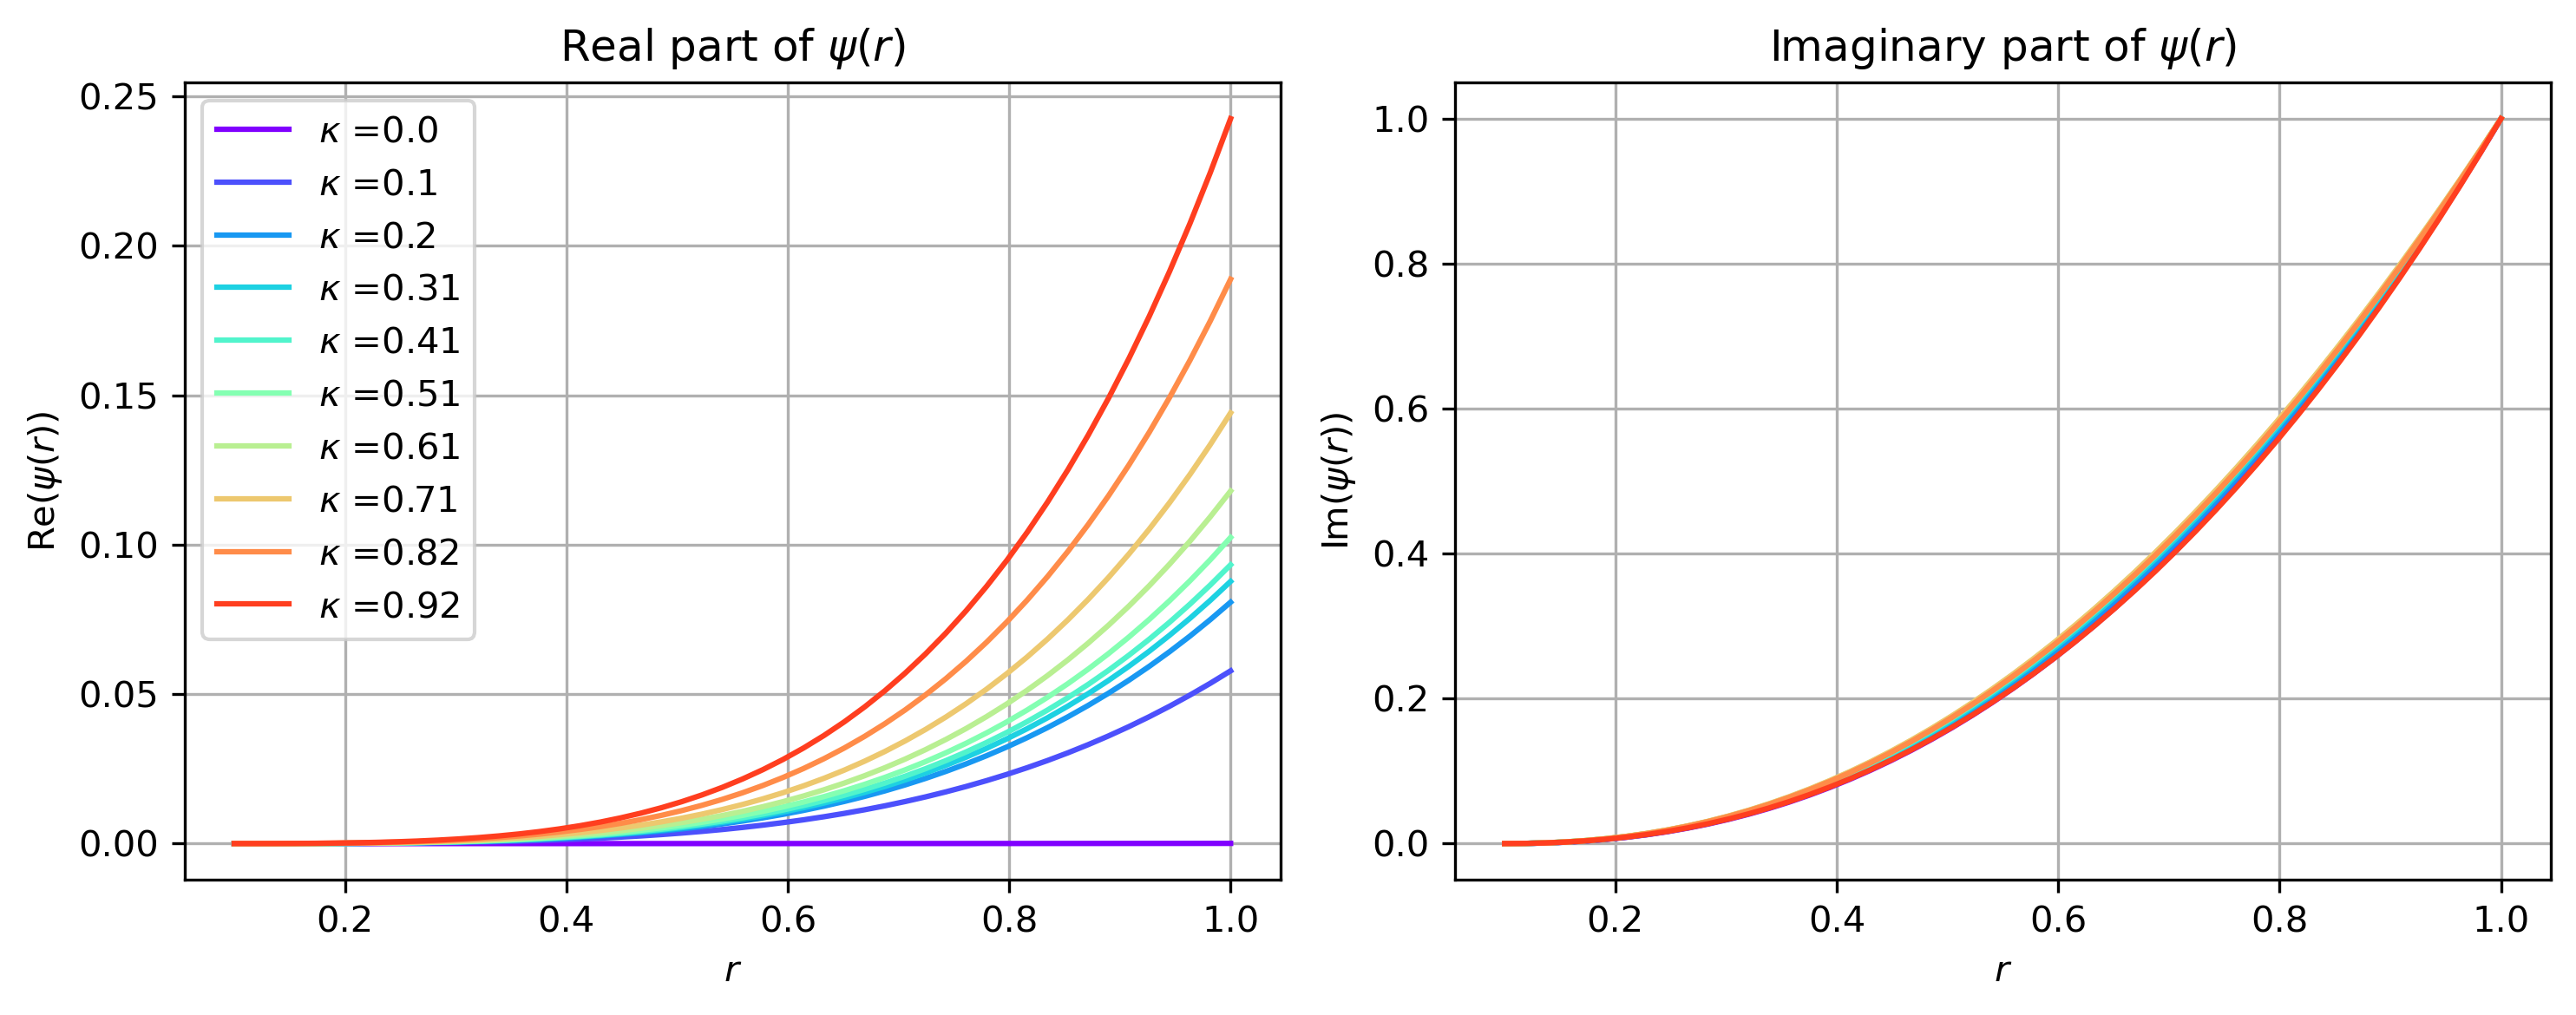

In [23]:
## now we loop around the values of kappa

epsilon = 0.1
kappa_vect = np.linspace(0.0001,1, 50)
Lambda_vect = np.zeros_like(kappa_vect, dtype='complex')
eigenfunction_coefs = np.zeros((len(kappa_vect), 4), dtype='complex')
eigenfunction_coefs[:,-1] = 1
alpha_ = 0.1; Bo = epsilon; Ca = epsilon; D_ = 1
r_ = np.linspace(alpha_, 1, 50)
import sympy as sp
from sympy.functions.special.bessel import besseli, besselk, besselj, bessely
from scipy.special import jv,kv,iv,yv
kappa, r, alpha,Lambda, D = sp.symbols('kappa, r, alpha,Lambda,D')
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                       -sp.I*r*besseli(1,kappa*r)/kappa, 
                       -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                       sp.I*r*besselk(1, kappa*r)/kappa
                      ])#*kappa**2/sp.I/r*2

v = sp.simplify(v)
u = 1/r*v*sp.I*kappa; w = -1/r*v.diff(r)
w_0 = 1/4*(sp.log(r/alpha_)-(r**2-alpha_**2))

expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])
colors = plt.cm.rainbow(np.linspace(0, 1, len(kappa_vect)))
#kinematic_bc
expr_S = sp.simplify(sp.I*kappa*u+w.diff(r))
expr_kinematic = sp.simplify((Lambda+w_0.subs(r,1)*sp.I*kappa)*expr_S-u)
expr_normal = sp.simplify(Bo*expr_p - 2*Ca*u.diff(r) + (D-kappa**2)*expr_S)
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
fig,ax = plt.subplots(dpi=300, nrows=1, ncols = 2,figsize=(10,4))
for j,kappa_ in enumerate(kappa_vect):
    def build_matrix(Lambda_):

        matrix_sp = np.zeros((4,4), dtype = 'complex')
        matrix_sp[0,:] = sp.lambdify([kappa, Lambda], v.subs(r,alpha_), modules=libraries)(kappa_, Lambda_).T
        matrix_sp[1,:] = sp.lambdify([kappa, Lambda], 
                                     v.diff(r).subs(r,alpha_), modules=libraries)(kappa_, Lambda_).T


        matrix_sp[2,:] = sp.lambdify([kappa, Lambda], expr_kinematic.subs(r,1), 
                                  modules=libraries)(kappa_, Lambda_).T
        matrix_sp[3,:] = sp.lambdify([kappa,Lambda, D], expr_normal.subs(r,1), 
                                  modules=libraries)(kappa_, Lambda_, D_).T
        return matrix_sp
    
    def f(Lambda_):
        return np.linalg.det(build_matrix(Lambda_))
    Lambda_vect[j] = scipy.optimize.root_scalar(f, x0=.1,x1=1,method='secant').root
    #compute eigenfunction
    matrix = build_matrix(Lambda_vect[j])
    A = matrix[0:-1, 0:-1]
    b = -matrix[0:-1, -1]
    eigenfunction_coefs[j,0:-1] = np.linalg.solve(A, b)
    print((j+1)/len(kappa_vect)*100)
    if j%5==0:
        print()
        print(j)
        print(np.shape(sp.lambdify([kappa,r], v, modules=libraries)(kappa_,r_ ).T@eigenfunction_coefs[j,:]))
        eigen_function = sp.lambdify([kappa,r], v, modules=libraries)(kappa_,r_ ).T@eigenfunction_coefs[j,:]
        ax[0].plot(r_, eigen_function.real/abs(eigen_function[-1].imag), 
                 label=fr'$\kappa$ ={round(kappa_,2)}',color = colors[j])
        ax[1].plot(r_, eigen_function.imag/abs(eigen_function[-1].imag), 
                 label=fr'$\kappa$ ={round(kappa_,2)}', color = colors[j])
        ax[0].grid(True);ax[1].grid(True)
        ax[0].set_xlabel(r'$r$');ax[1].set_xlabel(r'$r$')
        ax[0].set_ylabel(r'Re$(\psi(r))$');ax[1].set_ylabel(r'Im$(\psi(r))$')
        ax[0].set_title(r'Real part of $\psi(r)$');ax[1].set_title('Imaginary part of $\psi(r)$')
ax[0].legend()
plt.tight_layout()
plt.savefig(f'stokes_eigenfunction_alpha_{alpha_}_normalised_imag_1.pdf')
plt.show()


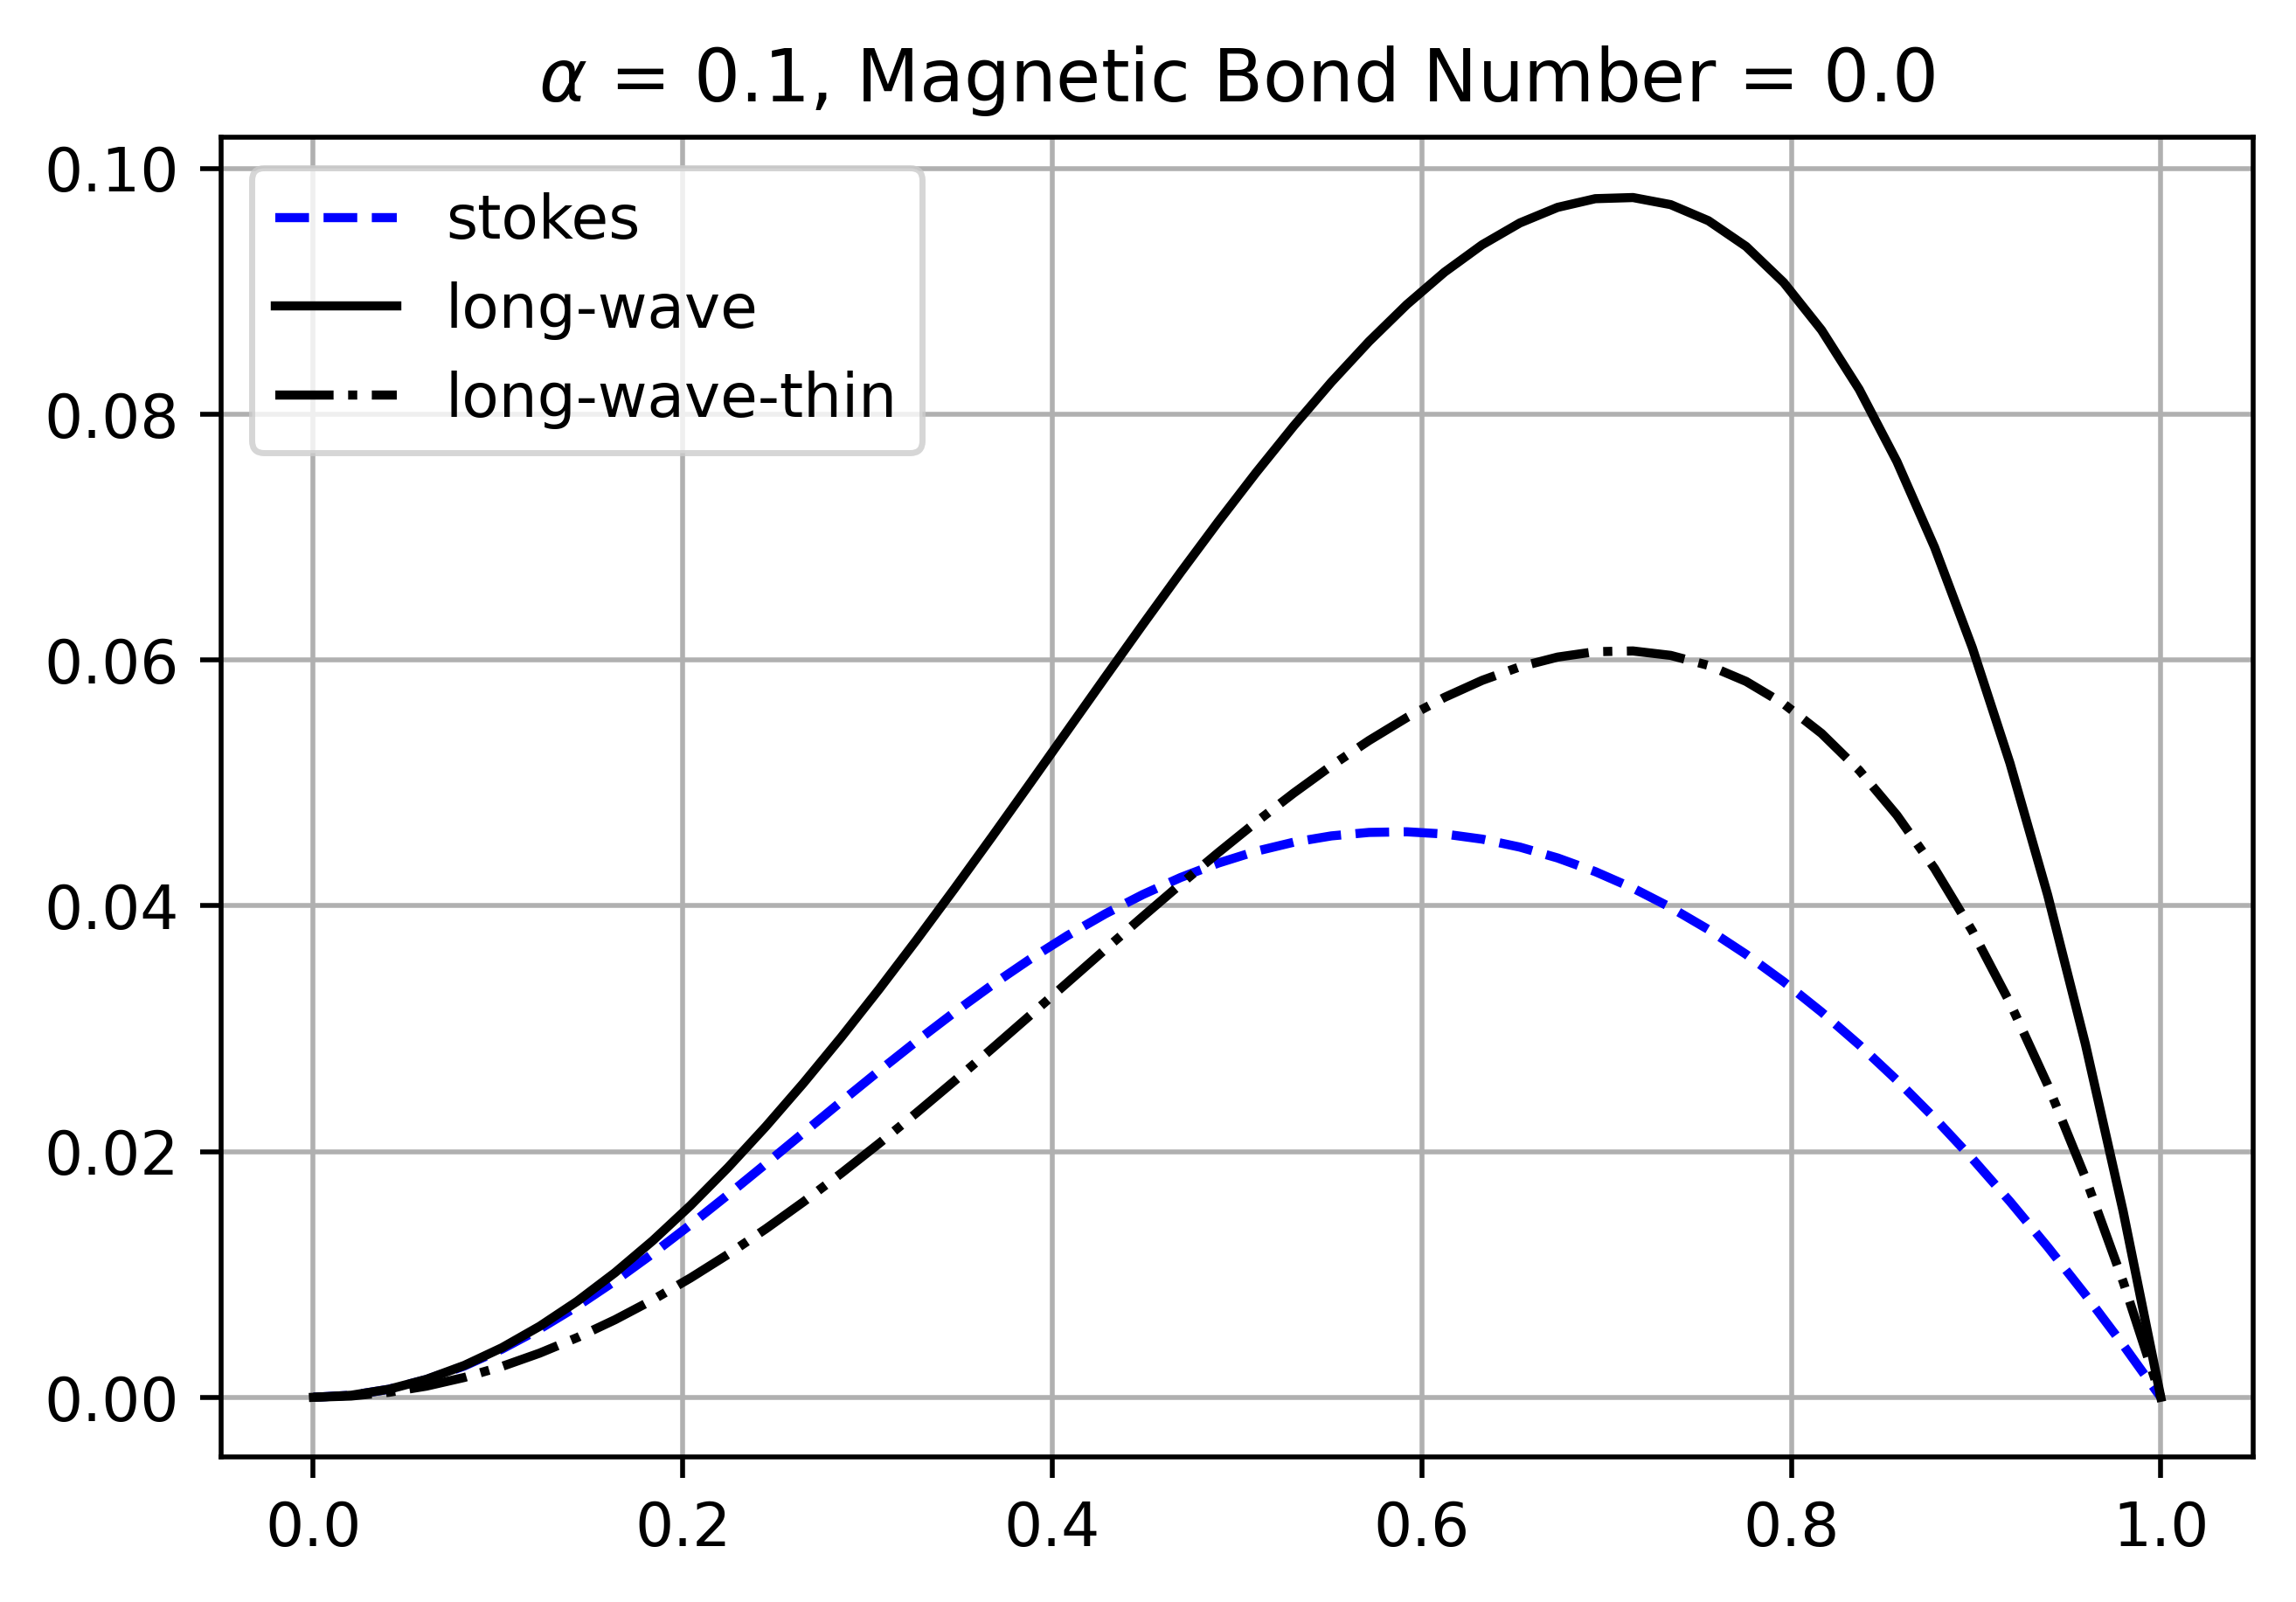

In [125]:
plt.figure(dpi=300)
k_vect = kappa_vect/epsilon
lambda_vect = k_vect**2/16*(epsilon**2*k_vect**2-D_)*((alpha_**2-1)**2-2*(alpha_**2-1-2*np.log(alpha_)))
lambda_vect_thin = k_vect**2/3*(D_-epsilon**2*k_vect**2)*(1-alpha_)**3
plt.plot(kappa_vect, epsilon*Lambda_vect.real, '--', label ='stokes',color='blue')
plt.plot(epsilon*k_vect, epsilon**2*lambda_vect, label='long-wave', color='black')
plt.plot(epsilon*k_vect, epsilon**2*lambda_vect_thin,'-.' ,label='long-wave-thin', color='black')
plt.grid(); plt.title(rf'$\alpha$ = {alpha_}, Magnetic Bond Number = {(1-D_)/2}'); plt.legend()
plt.savefig(f'Stokes_dispersion_relation_Ma_{(1-D_)/2}_alpha_{alpha_}.pdf')

In [21]:
sp.simplify(expr_S)

Matrix([
[I*(kappa*r*besseli(0, kappa*r) - besseli(1, kappa*r))],
[                        2*I*kappa*besseli(1, kappa*r)],
[I*(kappa*r*besselk(0, kappa*r) + besselk(1, kappa*r))],
[                       -2*I*kappa*besselk(1, kappa*r)]])

In [512]:
sp.simplify(expr_normal)

Matrix([
[-I*r*(D - kappa**2)*(-2*kappa*r*besseli(0, kappa*r) + r*besseli(1, kappa*r) + besseli(1, kappa*r))/2 - 0.1*I*r*(kappa*r*besseli(0, kappa*r) - 2*besseli(1, kappa*r)) + 0.1*besseli(0, kappa*r)],
[                                                           I*(-0.2*kappa*r*besseli(1, kappa*r) + (D - kappa**2)*(2*kappa*r*besseli(1, kappa*r) - r*besseli(0, kappa*r) + besseli(0, kappa*r)))],
[  I*r*(D - kappa**2)*(2*kappa*r*besselk(0, kappa*r) + r*besselk(1, kappa*r) + besselk(1, kappa*r))/2 - 0.1*I*r*(kappa*r*besselk(0, kappa*r) + 2*besselk(1, kappa*r)) + 0.1*besselk(0, kappa*r)],
[                                                            I*(0.2*kappa*r*besselk(1, kappa*r) - (D - kappa**2)*(2*kappa*r*besselk(1, kappa*r) + r*besselk(0, kappa*r) - besselk(0, kappa*r)))]])

In [ ]:
# plot eigen functions

# Attempt for analytical formulas

In [78]:
import sympy as sp
#from sympy.functions.special.bessel import besseli, besselk, besselj, bessely
#from scipy.special import jv,kv,iv,yv
kappa, r, alpha,Lambda,Bo, Ca, D = sp.symbols('kappa, r, alpha,Lambda, Bo, Ca,D')


matrix_sym = sp.Matrix()
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                       -sp.I*r*besseli(1,kappa*r)/kappa, 
                       -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                       sp.I*r*besselk(1, kappa*r)/kappa
                      ])#*kappa**2/sp.I/r*2

v = sp.simplify(v)
u = 1/r*v*sp.I*kappa; w = -1/r*v.diff(r)
w_0 = 1/4*(sp.log(r/alpha)-(r**2-alpha**2))

expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])
#kinematic_bc
expr_S = sp.simplify(sp.I*kappa*u+w.diff(r))
expr_kinematic = sp.simplify((Lambda+w_0*sp.I*kappa)*expr_S-u)

expr_normal = sp.simplify(Bo*expr_p - 2*Ca*u.diff(r) + (D-kappa**2)*expr_S)

matrix_sym=matrix_sym.row_insert(0,sp.simplify(u.subs(r,alpha)).T)
matrix_sym=matrix_sym.row_insert(1,sp.simplify(w.subs(r,alpha)).T)

#kinematic_bc
matrix_sym = matrix_sym.row_insert(2,expr_kinematic.subs(r,1).T)
matrix_sym = matrix_sym.row_insert(3,expr_normal.subs(r,1).T)
matrix_sym

Matrix([
[                                                                                                                                                            alpha*besseli(0, alpha*kappa)/2 - besseli(1, alpha*kappa)/kappa,                                                                                                 besseli(1, alpha*kappa),                                                                                                                                                             alpha*besselk(0, alpha*kappa)/2 + besselk(1, alpha*kappa)/kappa,                                                                                                -besselk(1, alpha*kappa)],
[                                                                                                                                                                                          I*alpha*besseli(1, alpha*kappa)/2,                                                                                    

In [37]:
matrix_for_neutral_curves = matrix_sym.subs(Lambda, 0)


In [54]:
len(matrix_for_neutral_curves.LUdecomposition())

3

In [59]:
L_mat = matrix_for_neutral_curves.LUdecomposition()[0]
U_mat = matrix_for_neutral_curves.LUdecomposition()[1]

In [60]:
L_mat

Matrix([
[                                                                                                                                                                                                                                                                                              1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           0,                                                                                                                                 

In [77]:

eq_guess = U_mat[3,3]
eq_guess

-2*Ca*kappa*besselk(0, kappa) - 2*Ca*besselk(1, kappa) - 2*I*D*kappa*besselk(1, kappa) + 2*I*kappa**3*besselk(1, kappa) - ((0.5*kappa**2*(alpha**2 + log(1/alpha) - 1) + 1)*besselk(1, kappa) - ((-0.5*kappa**2*(alpha**2 + log(1/alpha) - 1) - 1)*besseli(1, kappa) - (-0.25*kappa**2*(kappa*besseli(0, kappa) - besseli(1, kappa))*(alpha**2 + log(1/alpha) - 1) - kappa*besseli(0, kappa)/2 + besseli(1, kappa))*besseli(1, alpha*kappa)/(kappa*(alpha*besseli(0, alpha*kappa)/2 - besseli(1, alpha*kappa)/kappa)))*(I*alpha*besseli(1, alpha*kappa)*besselk(1, alpha*kappa)/(2*(alpha*besseli(0, alpha*kappa)/2 - besseli(1, alpha*kappa)/kappa)) + I*besselk(0, alpha*kappa))/(-I*alpha*besseli(1, alpha*kappa)**2/(2*(alpha*besseli(0, alpha*kappa)/2 - besseli(1, alpha*kappa)/kappa)) + I*besseli(0, alpha*kappa)) + (-0.25*kappa**2*(kappa*besseli(0, kappa) - besseli(1, kappa))*(alpha**2 + log(1/alpha) - 1) - kappa*besseli(0, kappa)/2 + besseli(1, kappa))*besselk(1, alpha*kappa)/(kappa*(alpha*besseli(0, alpha*kappa)/

In [76]:
simp_eq_guess = eq_guess.subs(Ca,0.1).subs(Bo, 0.1)
matrix_sym

Matrix([
[                                                                                                                                                            alpha*besseli(0, alpha*kappa)/2 - besseli(1, alpha*kappa)/kappa,                                                                                                 besseli(1, alpha*kappa),                                                                                                                                                             alpha*besselk(0, alpha*kappa)/2 + besselk(1, alpha*kappa)/kappa,                                                                                                -besselk(1, alpha*kappa)],
[                                                                                                                                                                                          I*alpha*besseli(1, alpha*kappa)/2,                                                                                    

In [75]:
sp.series(matrix_sym[0,0], alpha, 1, 4)

-besseli(1, kappa)/kappa + besseli(0, kappa)/2 + (alpha - 1)*(kappa*besseli(1, kappa)/2 - besseli(2, kappa)/2) + (alpha - 1)**2*(kappa**2*besseli(0, kappa)/8 + kappa**2*besseli(2, kappa)/8 + kappa*besseli(1, kappa)/8 - kappa*besseli(3, kappa)/8) + (alpha - 1)**3*(kappa**3*besseli(1, kappa)/16 + kappa**3*besseli(3, kappa)/48 + kappa**2*besseli(0, kappa)/16 + kappa**2*besseli(2, kappa)/24 - kappa**2*besseli(4, kappa)/48) + O((alpha - 1)**4, (alpha, 1))

0.1


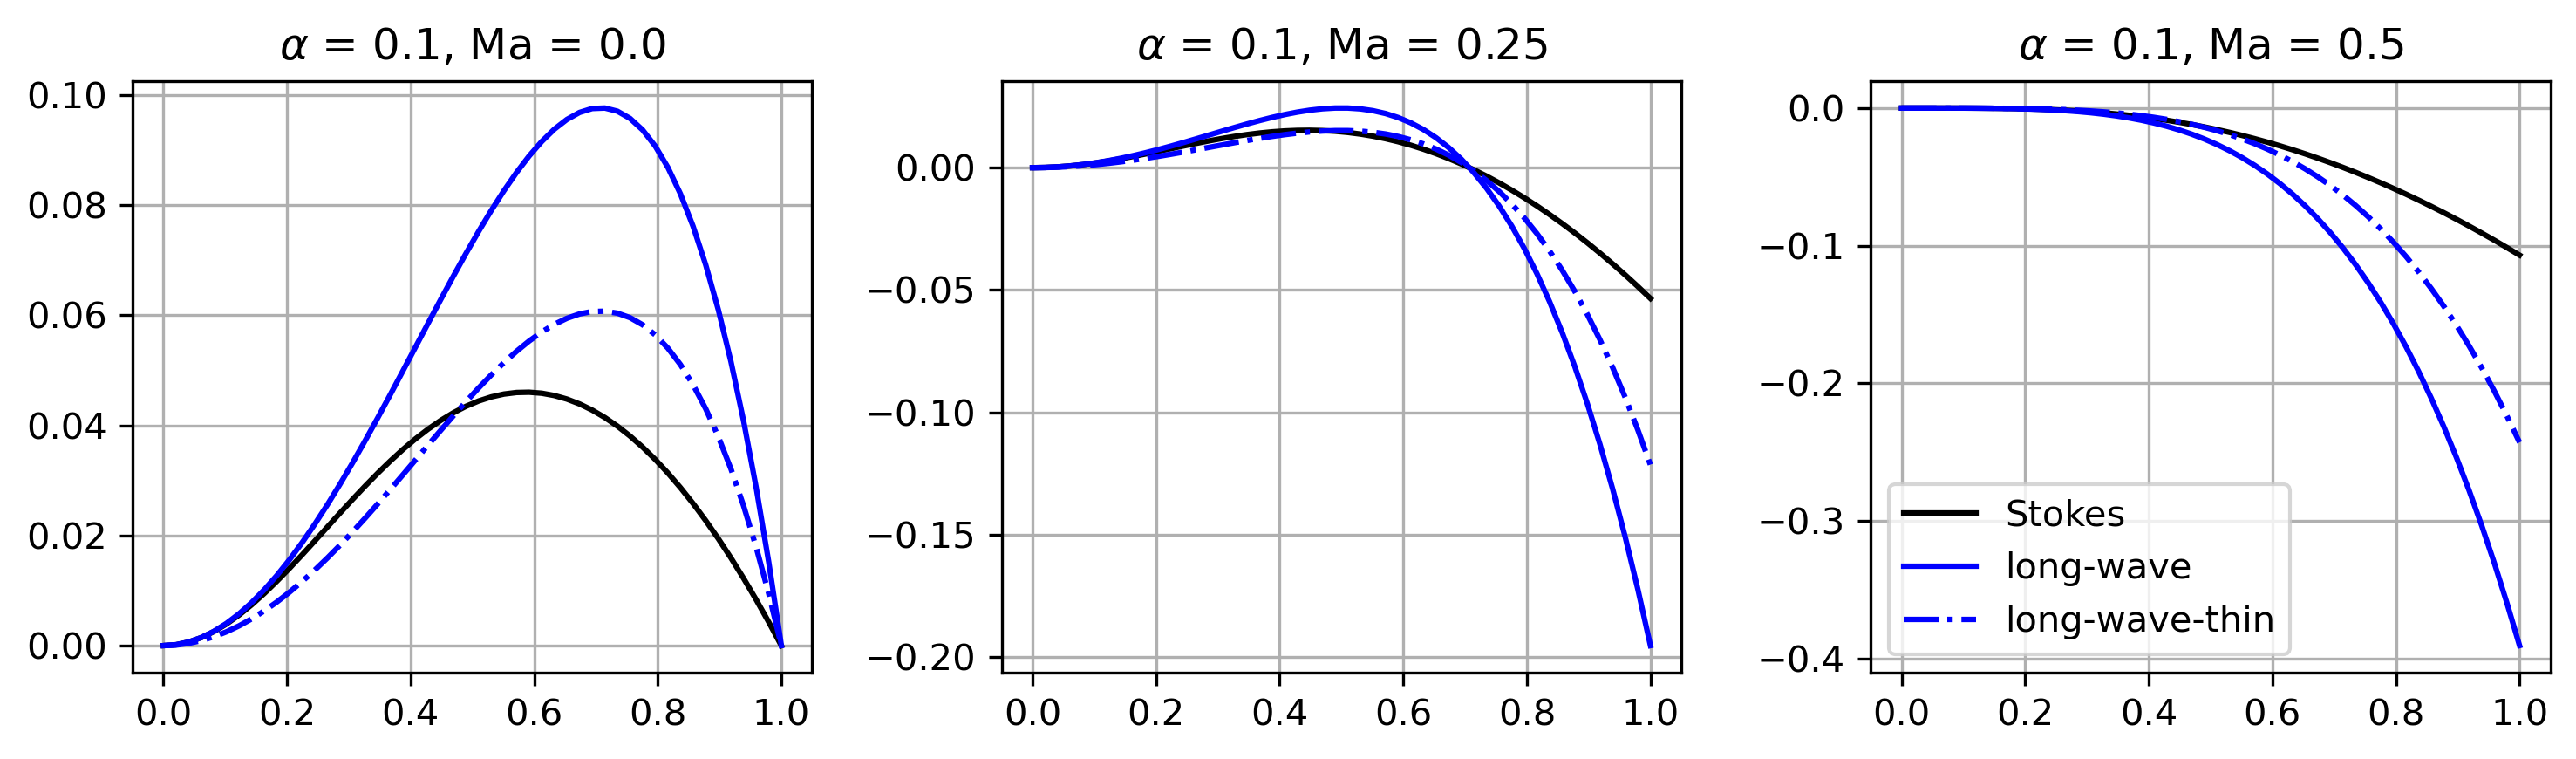

0.5


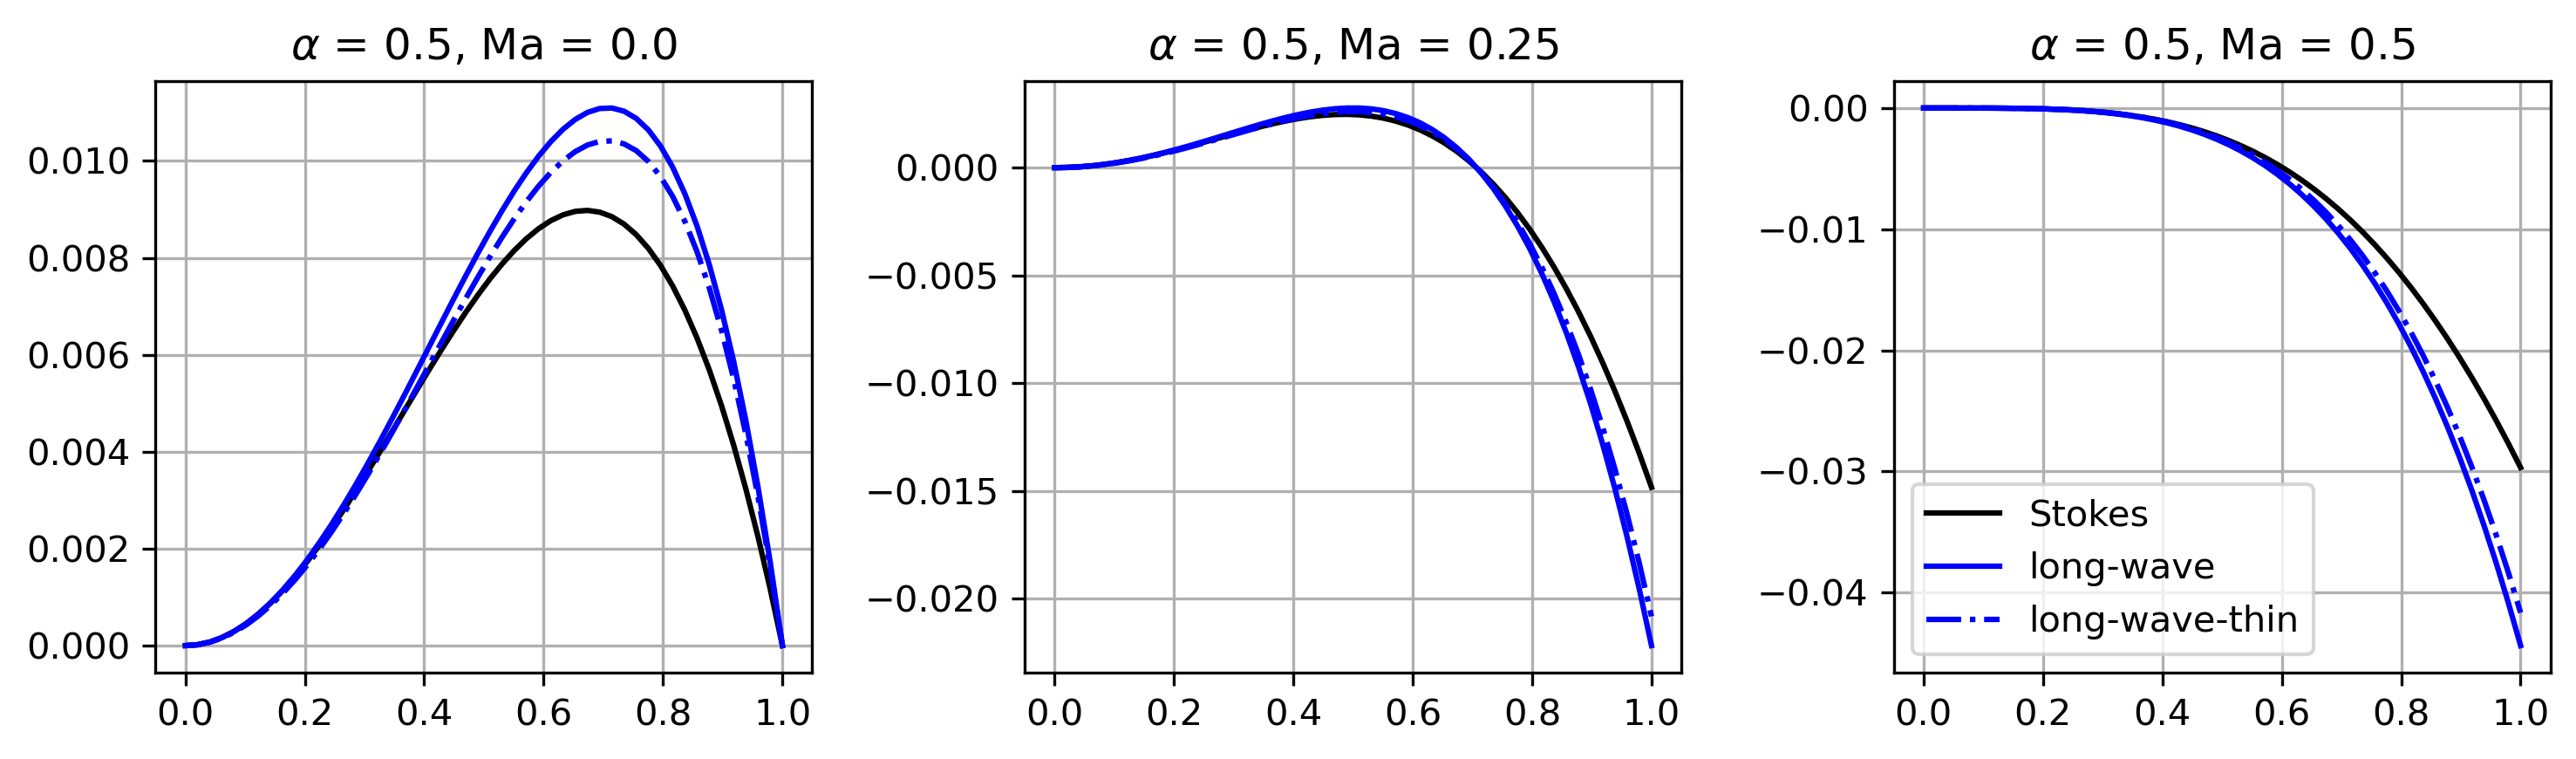

0.9


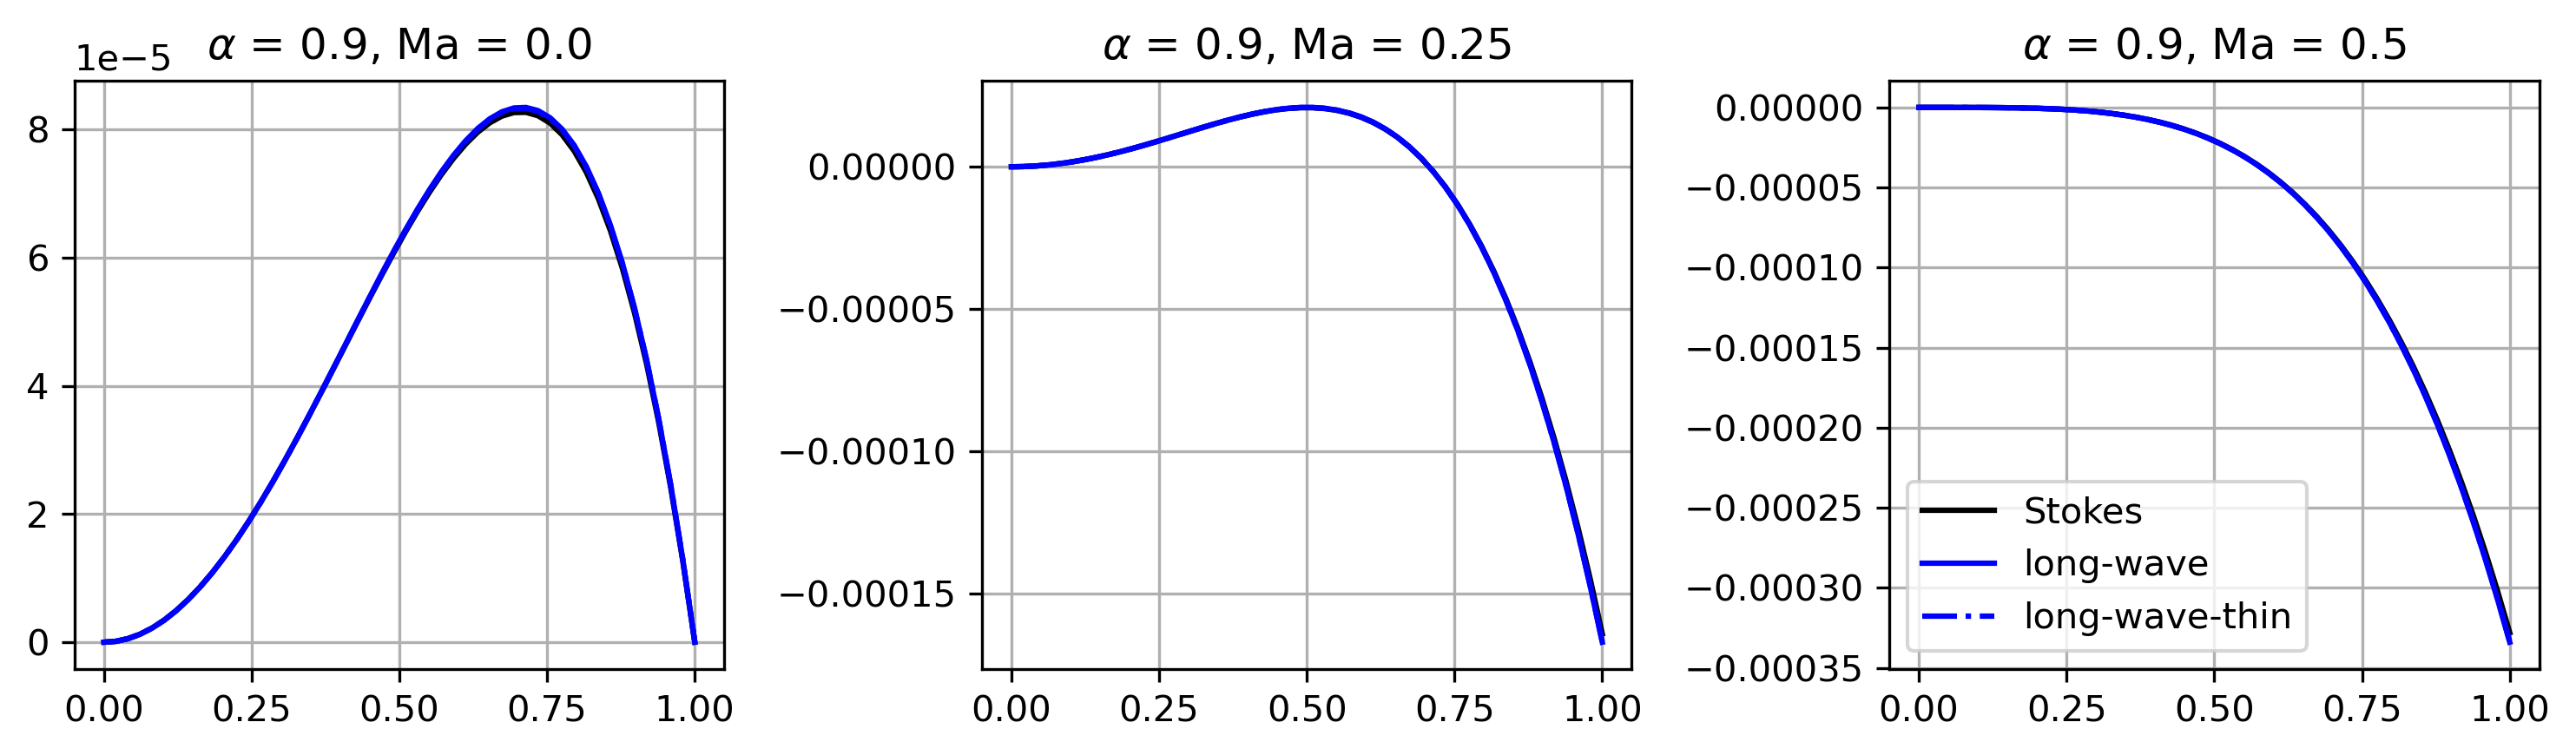

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv
from scipy.optimize import fsolve
import scipy
## now we loop around the valuesof kappa
epsilon = 0.1
kappa_vect = np.linspace(0.0001,1, 50)
Lambda_vect = np.zeros_like(kappa_vect, dtype='complex')

alpha_vect = np.array([0.1,0.5,0.9]); Bo = epsilon; Ca = epsilon; D_vect = np.array([1,0.5,0])
#r_ = np.linspace(alpha_, 1, 50)
import sympy as sp
from sympy.functions.special.bessel import besseli, besselk, besselj, bessely
from scipy.special import jv,kv,iv,yv
kappa, r, alpha,Lambda, D = sp.symbols('kappa, r, alpha,Lambda,D')
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                       -sp.I*r*besseli(1,kappa*r)/kappa, 
                       -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                       sp.I*r*besselk(1, kappa*r)/kappa
                      ])#*kappa**2/sp.I/r*2

v = sp.simplify(v)
u = 1/r*v*sp.I*kappa; w = -1/r*v.diff(r)
w_0 = 1/4*(sp.log(r/alpha_)-(r**2-alpha_**2))

expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])

#kinematic_bc
expr_S = sp.simplify(sp.I*kappa*u+w.diff(r))
expr_kinematic = sp.simplify((Lambda+w_0.subs(r,1)*sp.I*kappa)*expr_S-u)
expr_normal = sp.simplify(Bo*expr_p - 2*Ca*u.diff(r) + (D-kappa**2)*expr_S)
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
for alpha_ in alpha_vect:
    print(alpha_)
    fig, ax = plt.subplots(dpi=300, nrows =1, ncols = len(D_vect), figsize = (10,3))
    for l,D_ in enumerate(D_vect):
        for j,kappa_ in enumerate(kappa_vect):
            def build_matrix(Lambda_):
                matrix_sp = np.zeros((4,4), dtype = 'complex')
                matrix_sp[0,:] = sp.lambdify([kappa, Lambda], v.subs(r,alpha_), 
                                             modules=libraries)(kappa_, Lambda_).T
                matrix_sp[1,:] = sp.lambdify([kappa, Lambda], 
                                             v.diff(r).subs(r,alpha_), modules=libraries)(kappa_, Lambda_).T


                matrix_sp[2,:] = sp.lambdify([kappa, Lambda], expr_kinematic.subs(r,1), 
                                          modules=libraries)(kappa_, Lambda_).T
                matrix_sp[3,:] = sp.lambdify([kappa,Lambda, D], expr_normal.subs(r,1), 
                                          modules=libraries)(kappa_, Lambda_, D_).T
                return matrix_sp

            def f(Lambda_):
                return np.linalg.det(build_matrix(Lambda_))
            Lambda_vect[j] = scipy.optimize.root_scalar(f, x0=.1,x1=1,method='secant').root
            #print((j+1)/len(kappa_vect)*100)

        k_vect = kappa_vect/epsilon
        lambda_vect = k_vect**2/16*(epsilon**2*k_vect**2-D_)*((alpha_**2-1)**2-2*(alpha_**2-1-2*np.log(alpha_)))
        lambda_vect_thin = k_vect**2/3*(D_-epsilon**2*k_vect**2)*(1-alpha_)**3
        ax[l].plot(kappa_vect, epsilon*Lambda_vect.real, '-', label ='Stokes',color='black')
        ax[l].plot(epsilon*k_vect, epsilon**2*lambda_vect, label='long-wave', color='blue')
        ax[l].plot(epsilon*k_vect, epsilon**2*lambda_vect_thin,'-.' ,label='long-wave-thin', color='blue')
        ax[l].grid(); ax[l].set_title(rf'$\alpha$ = {alpha_}, Ma = {(1-D_)/2}'); 
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'HD_Stokes_dispersion_relation_alpha_{alpha_}.pdf')
    
    plt.show()
            


0.1


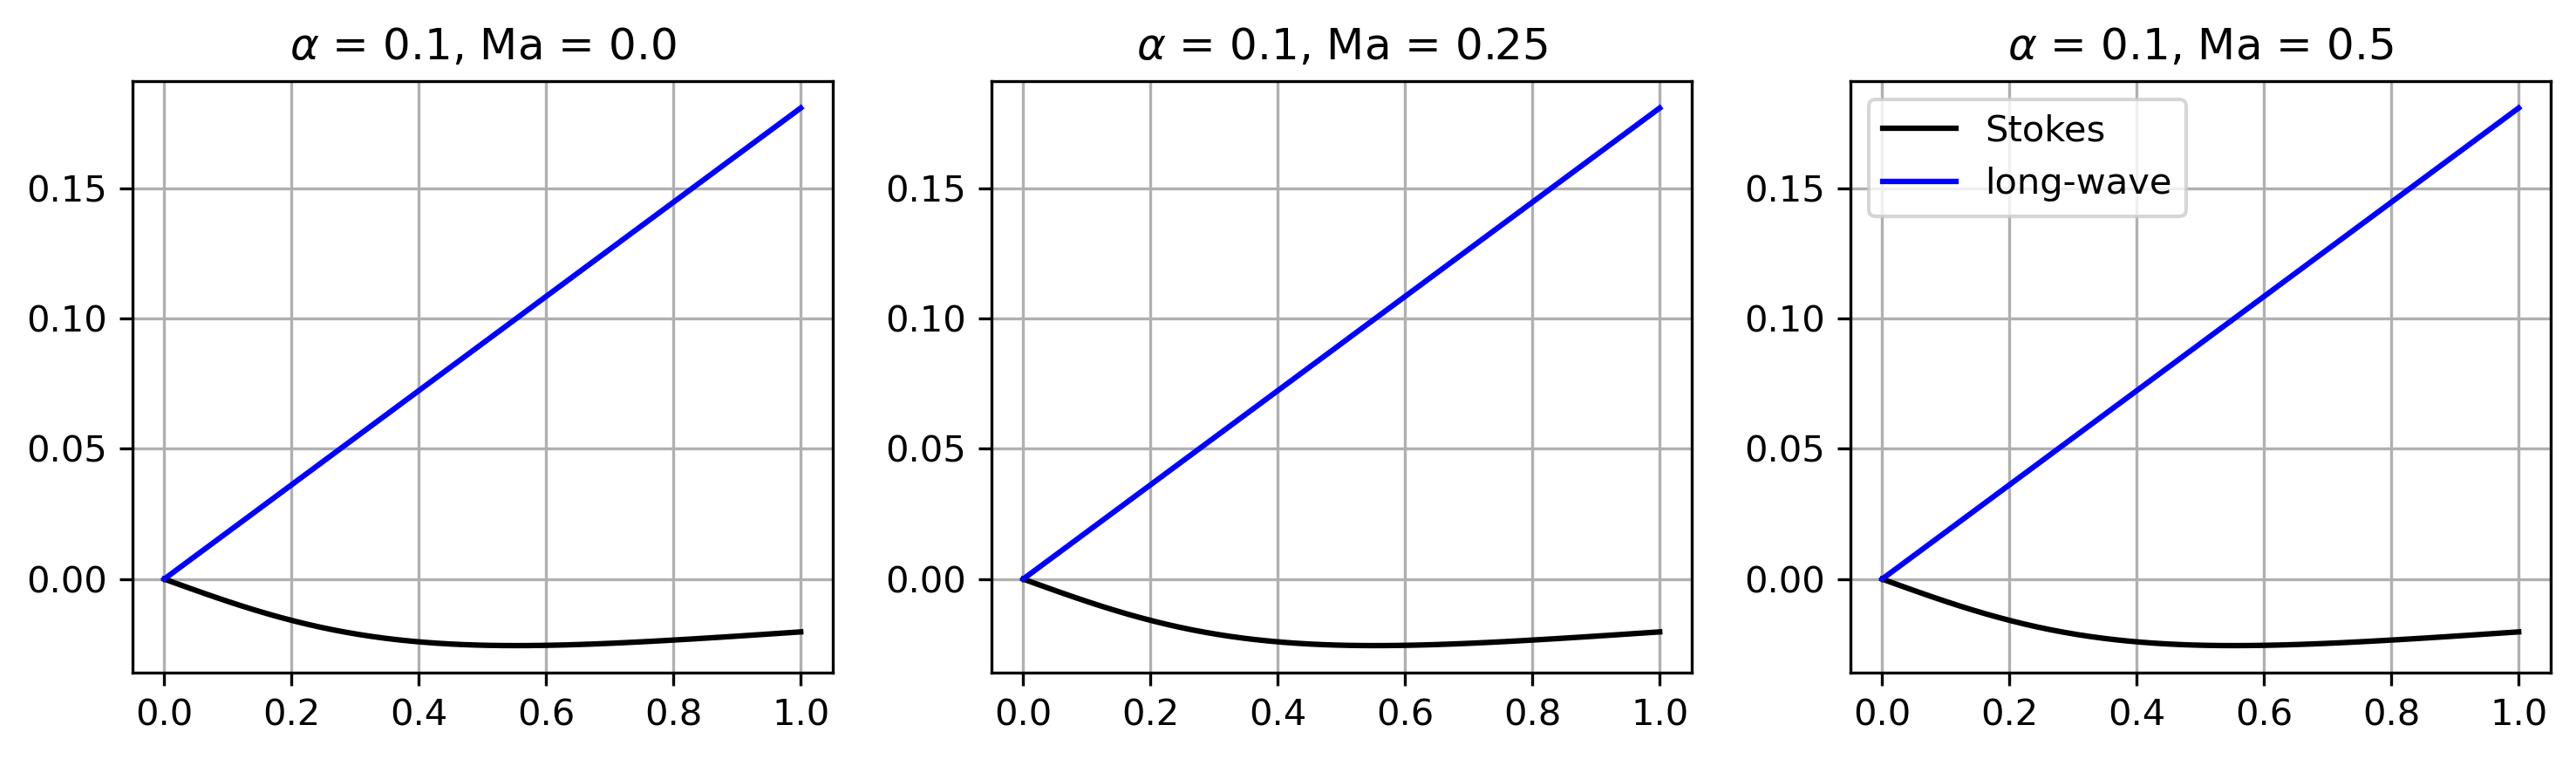

0.5


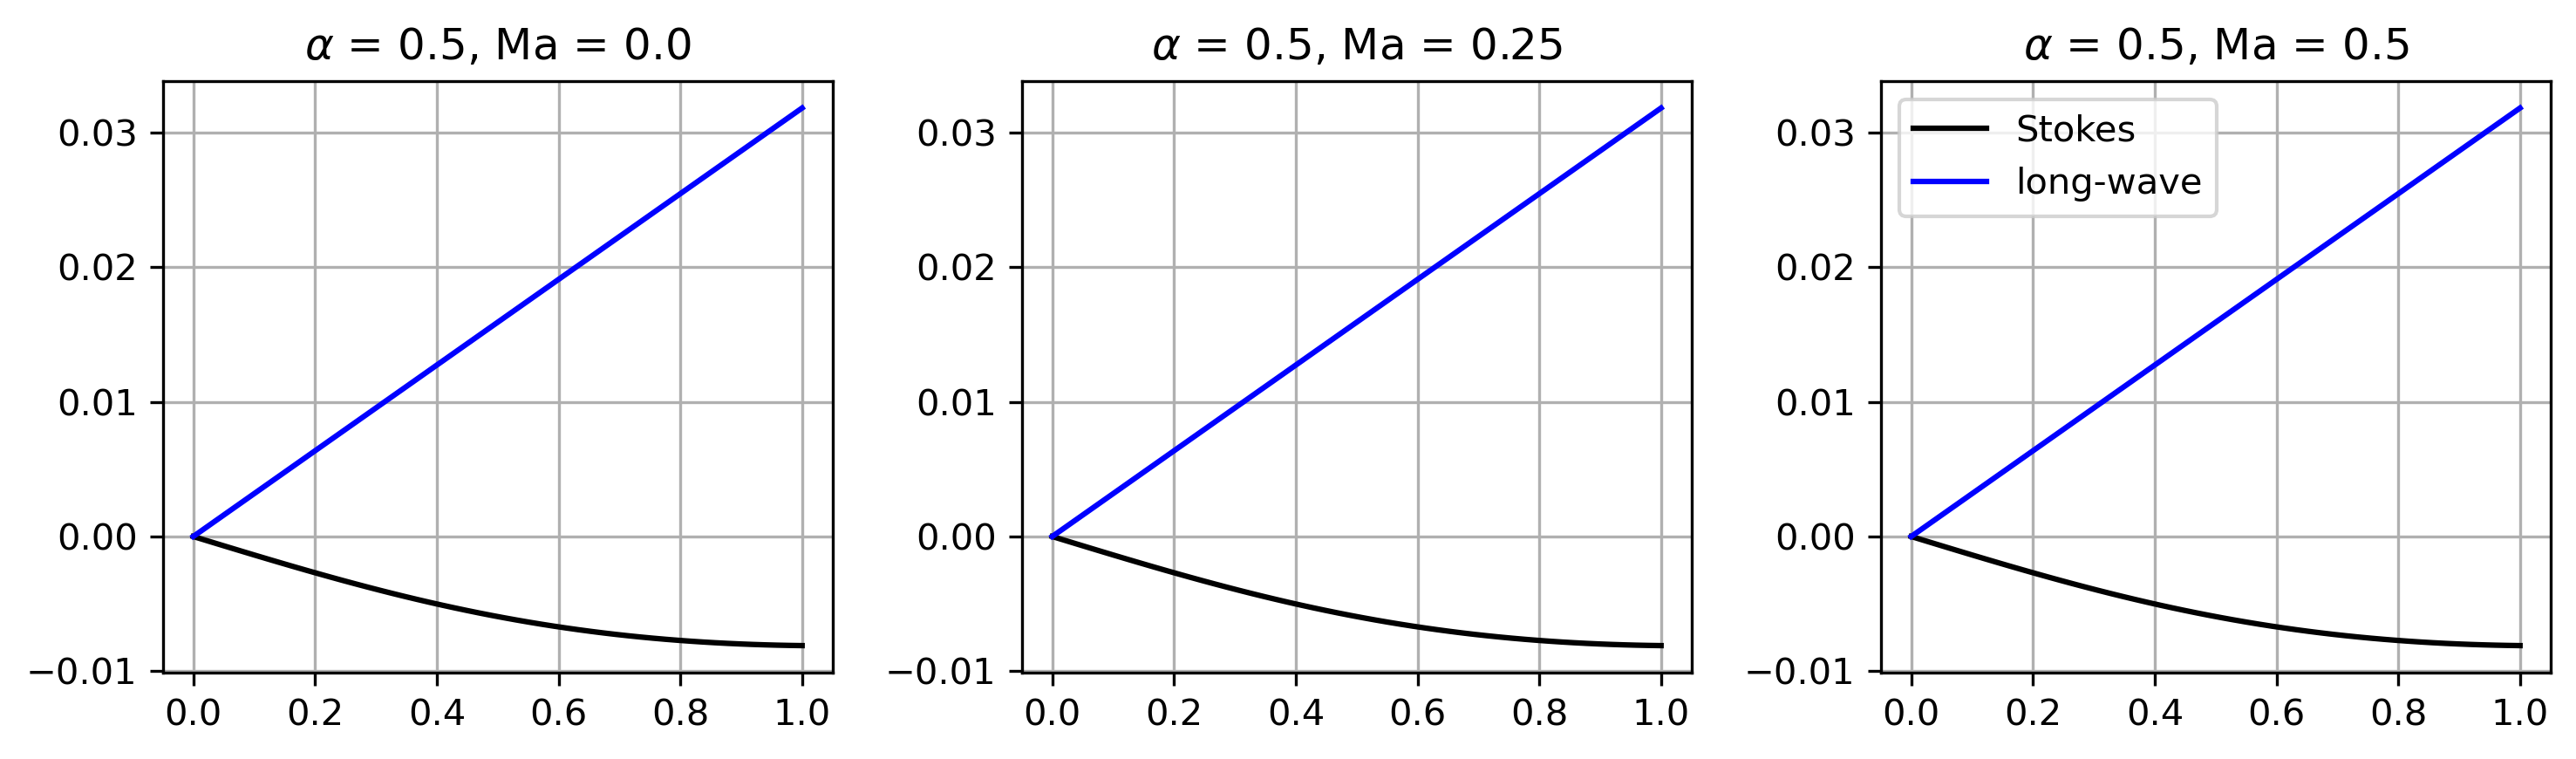

0.9


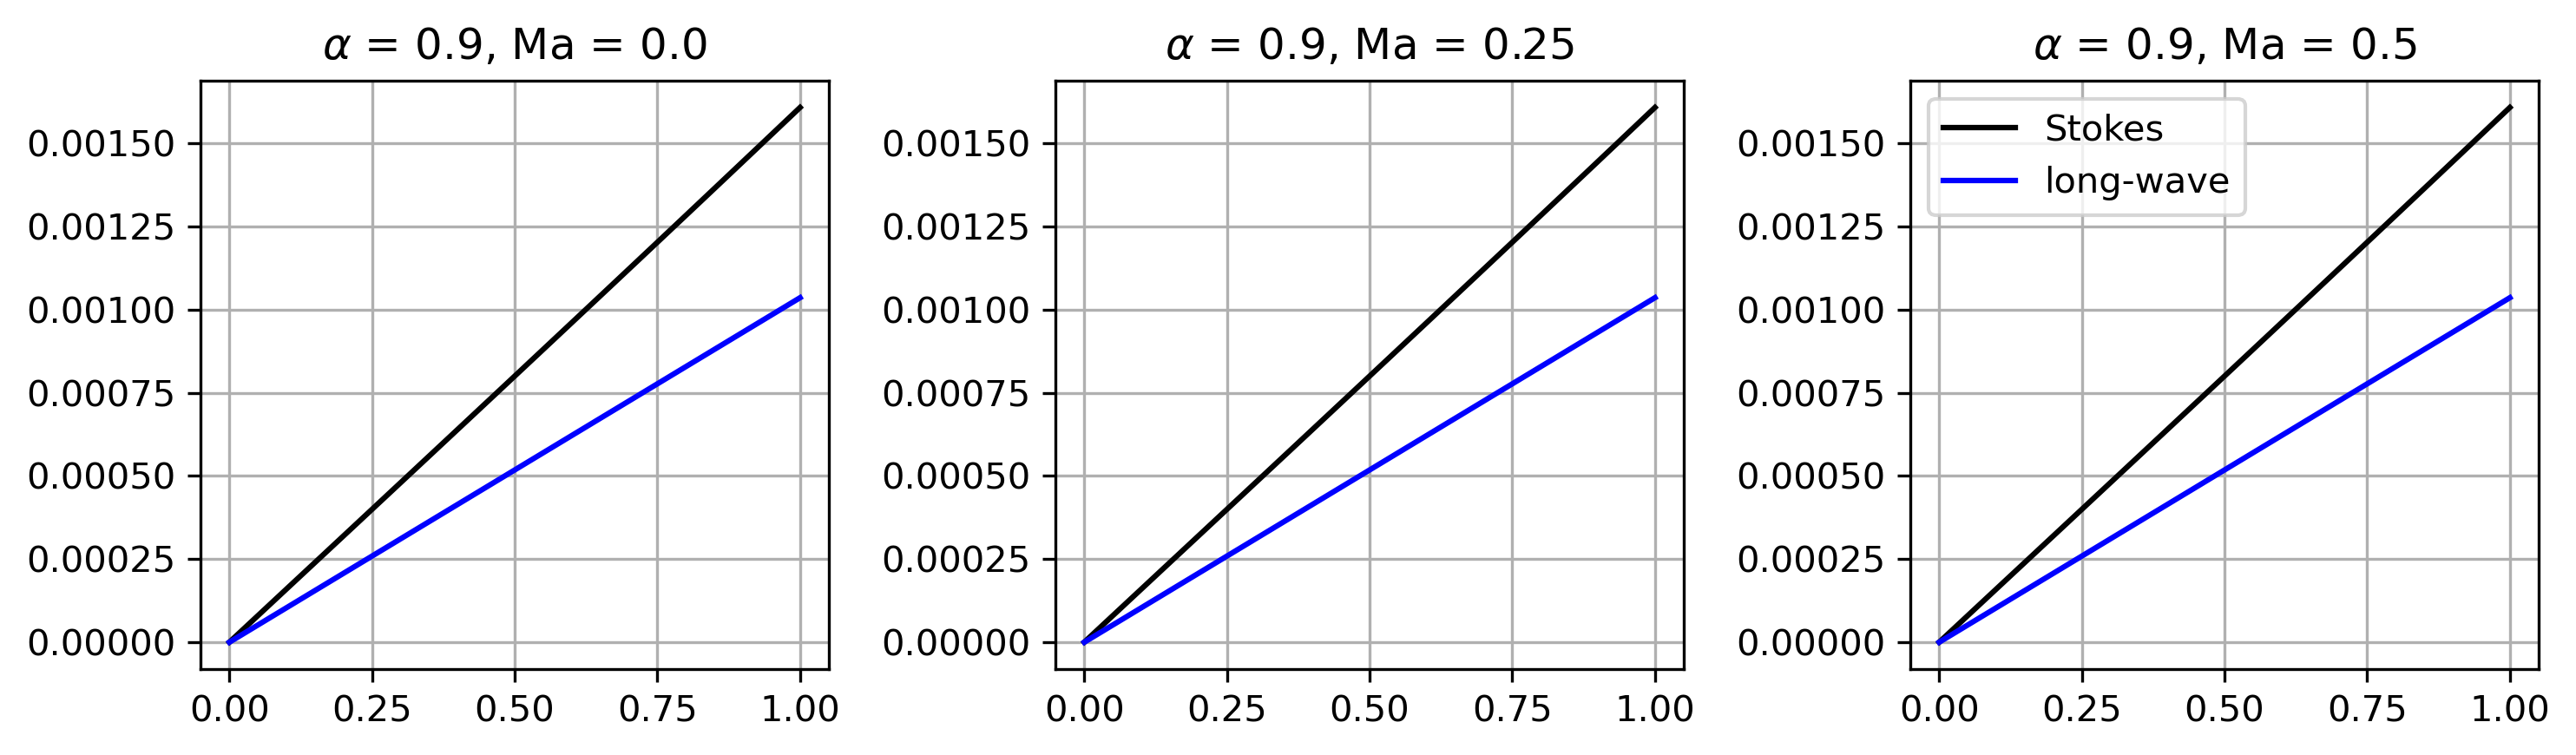

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv
from scipy.optimize import fsolve
import scipy
## now we loop around the valuesof kappa
epsilon = 0.1
kappa_vect = np.linspace(0.0001,1, 50)
Lambda_vect = np.zeros_like(kappa_vect, dtype='complex')

alpha_vect = np.array([0.1,0.5,0.9]); Bo = epsilon; Ca = epsilon; D_vect = np.array([1,0.5,0])
#r_ = np.linspace(alpha_, 1, 50)
import sympy as sp
from sympy.functions.special.bessel import besseli, besselk, besselj, bessely
from scipy.special import jv,kv,iv,yv
kappa, r, alpha,Lambda, D = sp.symbols('kappa, r, alpha,Lambda,D')
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                       -sp.I*r*besseli(1,kappa*r)/kappa, 
                       -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                       sp.I*r*besselk(1, kappa*r)/kappa
                      ])#*kappa**2/sp.I/r*2

v = sp.simplify(v)
u = 1/r*v*sp.I*kappa; w = -1/r*v.diff(r)
w_0 = 1/4*(sp.log(r/alpha_)-(r**2-alpha_**2))

expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])

#kinematic_bc
expr_S = sp.simplify(sp.I*kappa*u+w.diff(r))
expr_kinematic = sp.simplify((Lambda+w_0.subs(r,1)*sp.I*kappa)*expr_S-u)
expr_normal = sp.simplify(Bo*expr_p - 2*Ca*u.diff(r) + (D-kappa**2)*expr_S)
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
for alpha_ in alpha_vect:
    print(alpha_)
    fig, ax = plt.subplots(dpi=300, nrows =1, ncols = len(D_vect), figsize = (10,3))
    for l,D_ in enumerate(D_vect):
        for j,kappa_ in enumerate(kappa_vect):
            def build_matrix(Lambda_):
                matrix_sp = np.zeros((4,4), dtype = 'complex')
                matrix_sp[0,:] = sp.lambdify([kappa, Lambda], v.subs(r,alpha_), 
                                             modules=libraries)(kappa_, Lambda_).T
                matrix_sp[1,:] = sp.lambdify([kappa, Lambda], 
                                             v.diff(r).subs(r,alpha_), modules=libraries)(kappa_, Lambda_).T


                matrix_sp[2,:] = sp.lambdify([kappa, Lambda], expr_kinematic.subs(r,1), 
                                          modules=libraries)(kappa_, Lambda_).T
                matrix_sp[3,:] = sp.lambdify([kappa,Lambda, D], expr_normal.subs(r,1), 
                                          modules=libraries)(kappa_, Lambda_, D_).T
                return matrix_sp

            def f(Lambda_):
                return np.linalg.det(build_matrix(Lambda_))
            Lambda_vect[j] = scipy.optimize.root_scalar(f, x0=.1,x1=1,method='secant').root
            #print((j+1)/len(kappa_vect)*100)

        k_vect = kappa_vect/epsilon
        lambda_vect = k_vect**2/16*(epsilon**2*k_vect**2-D_)*((alpha_**2-1)**2-2*(alpha_**2-1-2*np.log(alpha_)) + 1j/2*k_vect*(2*np.log(alpha_)+1-alpha_**2))
        lambda_vect = -1/2*k_vect*(2*np.log(alpha_) + 1 - alpha_**2)
        lambda_vect_thin = k_vect**2/3*(D_-epsilon**2*k_vect**2)*(1-alpha_)**3
        ax[l].plot(kappa_vect, epsilon*Lambda_vect.imag, '-', label ='Stokes',color='black')
        ax[l].plot(epsilon*k_vect, epsilon**2*lambda_vect, label='long-wave', color='blue')
        #ax[l].plot(epsilon*k_vect, epsilon**2*lambda_vect_thin,'-.' ,label='long-wave-thin', color='blue')
        ax[l].grid(); ax[l].set_title(rf'$\alpha$ = {alpha_}, Ma = {(1-D_)/2}'); 
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'HD_Stokes_dispersion_relation_alpha_{alpha_}_imag.pdf')
    
    plt.show()
            


In [20]:
#neutral curves. We fix alpha, hope for the best from the real part plots it does look like it does not matter. 
# we have to loop around D and k, find where Lambda = 0. First get a big matrix. For each D, 
#we expect two points where the growth rate is zero, k=0 and k_c>0
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv
from scipy.optimize import fsolve
import scipy
## now we loop around the valuesof kappa
epsilon = 0.1
Ma_vect = np.linspace(0, 1/2, 10)
kappa_vect = np.linspace(0.0001,1, 50)
Lambda_array = np.zeros((len(Ma_vect), len(kappa_vect)), dtype='complex')
alpha_ = 0.5
Bo = epsilon; Ca = epsilon; 
#r_ = np.linspace(alpha_, 1, 50)
import sympy as sp
from sympy.functions.special.bessel import besseli, besselk, besselj, bessely
from scipy.special import jv,kv,iv,yv
kappa, r, alpha,Lambda, D = sp.symbols('kappa, r, alpha,Lambda,D')
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"] 
v = sp.Matrix([sp.I *r/kappa**2*besseli(1, kappa*r)-sp.I*r**2*besseli(0,kappa*r)/2/kappa, 
                       -sp.I*r*besseli(1,kappa*r)/kappa, 
                       -sp.I*r*besselk(1,kappa*r)/kappa**2-sp.I*r**2*besselk(0,kappa*r)/2/kappa,
                       sp.I*r*besselk(1, kappa*r)/kappa
                      ])#*kappa**2/sp.I/r*2

v = sp.simplify(v)
u = 1/r*v*sp.I*kappa; w = -1/r*v.diff(r)
w_0 = 1/4*(sp.log(r/alpha_)-(r**2-alpha_**2))

expr_p = sp.Matrix([besseli(0,kappa*r), 0, besselk(0, kappa*r), 0])

#kinematic_bc
expr_S = sp.simplify(sp.I*kappa*u+w.diff(r))
expr_kinematic = sp.simplify((Lambda+w_0.subs(r,1)*sp.I*kappa)*expr_S-u)
expr_normal = sp.simplify(Bo*expr_p - 2*Ca*u.diff(r) + (D-kappa**2)*expr_S)
bessel = {'besselj': jv,'besselk':kv,'besseli':iv,'bessely':yv}
libraries = [bessel, "numpy"]; print('Starting')
for l, Ma_ in enumerate(Ma_vect):
    D_ = 1-2*Ma_
    for j,kappa_ in enumerate(kappa_vect):
        def build_matrix(Lambda_):
            matrix_sp = np.zeros((4,4), dtype = 'complex')
            matrix_sp[0,:] = sp.lambdify([kappa, Lambda], v.subs(r,alpha_), 
                                             modules=libraries)(kappa_, Lambda_).T
            matrix_sp[1,:] = sp.lambdify([kappa, Lambda], 
                                             v.diff(r).subs(r,alpha_), modules=libraries)(kappa_, Lambda_).T


            matrix_sp[2,:] = sp.lambdify([kappa, Lambda], expr_kinematic.subs(r,1), 
                                          modules=libraries)(kappa_, Lambda_).T
            matrix_sp[3,:] = sp.lambdify([kappa,Lambda, D], expr_normal.subs(r,1), 
                                          modules=libraries)(kappa_, Lambda_, D_).T
            return matrix_sp

        def f(Lambda_):
            return np.linalg.det(build_matrix(Lambda_))
        Lambda_array[l, j] = scipy.optimize.root_scalar(f, x0=.1,x1=1,method='secant').root


Starting


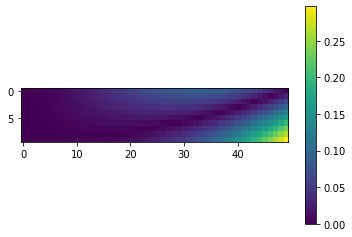

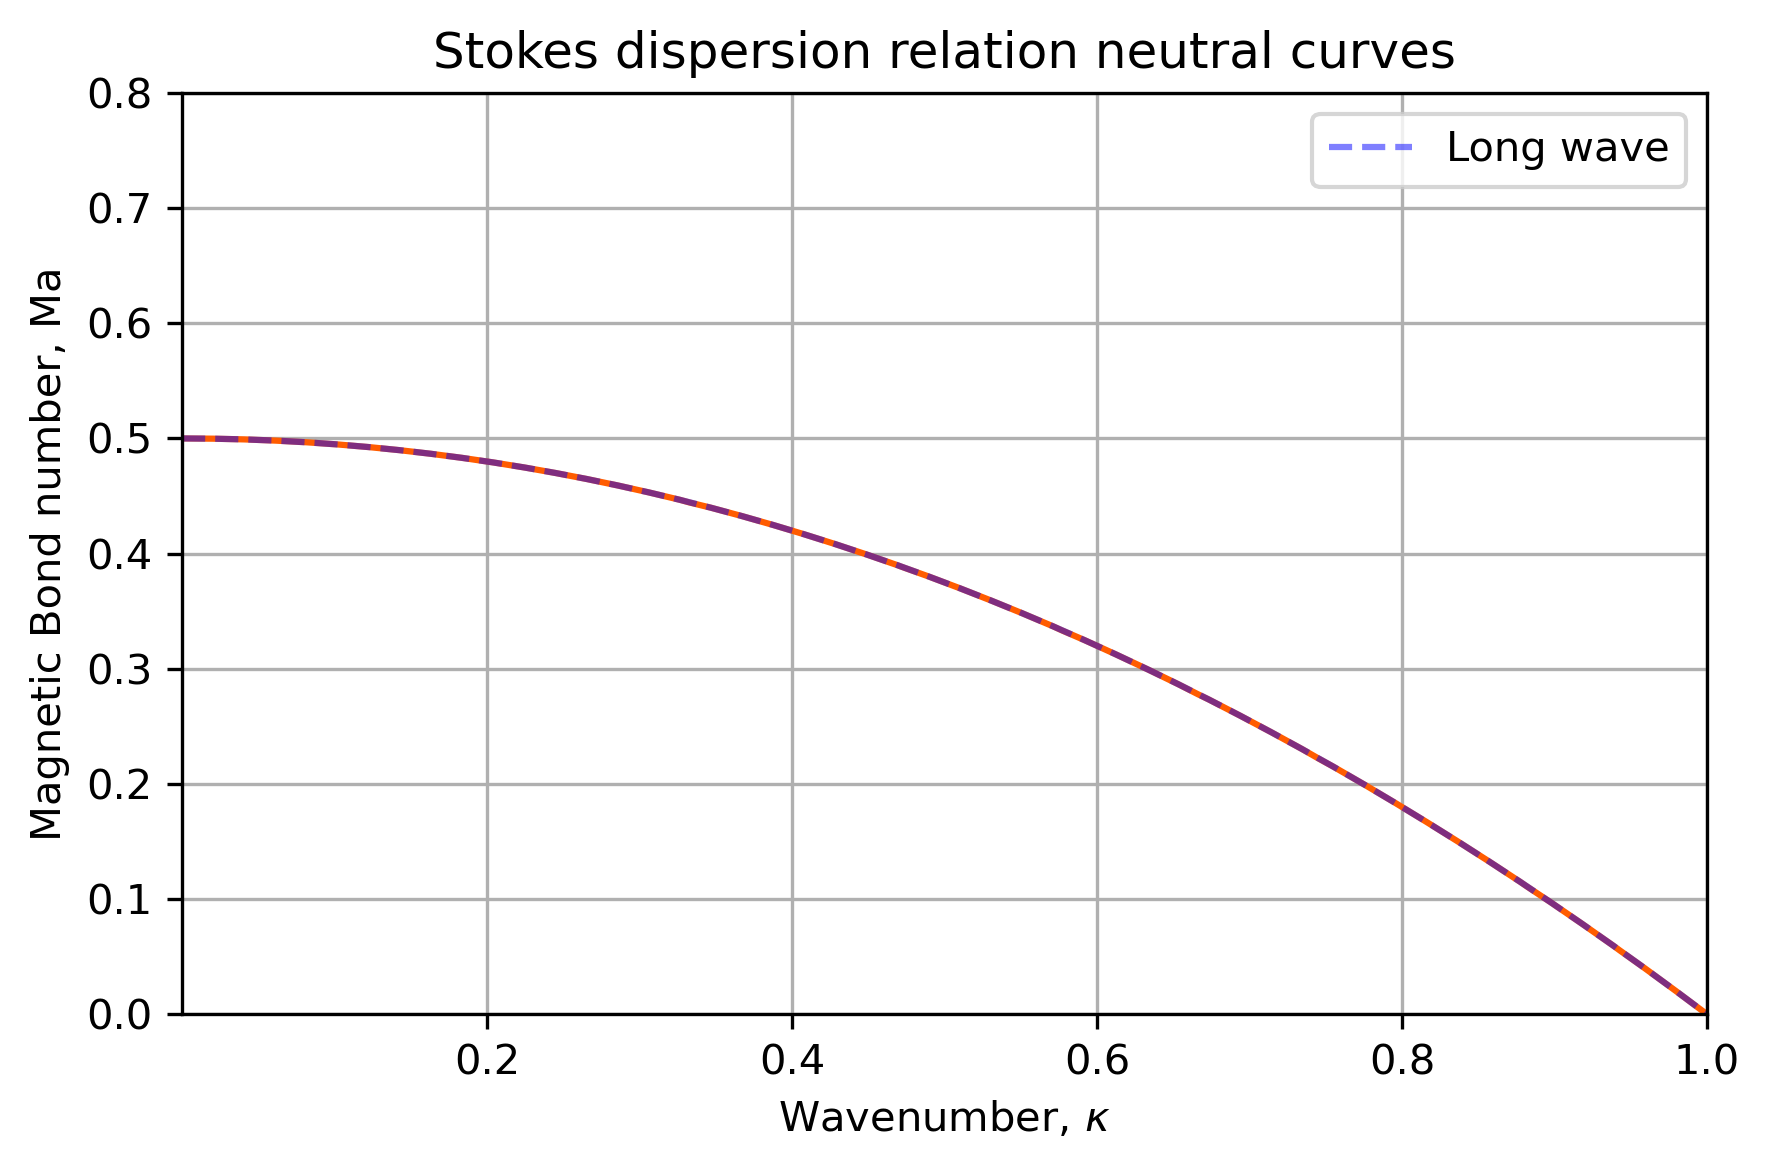

In [21]:
list1 = np.argmin(abs(Lambda_array.real), axis=0)
Ma_sol = np.zeros_like(list1)
for j,elem in enumerate(list1):
    Ma_sol[j] = kappa_vect[elem]
plt.imshow(abs(Lambda_array.real)); plt.colorbar();plt.show()
MA, KAPPA = np.meshgrid(Ma_vect, kappa_vect)
plt.figure(dpi=300)
plt.contour(KAPPA, MA, Lambda_array.real.T, cmap='hot', levels= 0); #plt.colorbar()
plt.plot(kappa_vect, (1-kappa_vect**2)/2, '--', color='blue', label = 'Long wave', alpha=0.5)
plt.title('Stokes dispersion relation neutral curves')
plt.xlabel(r'Wavenumber, $\kappa$')
plt.ylabel('Magnetic Bond number, Ma')
plt.ylim([0, 0.8])
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('stokes_neutral_curves.pdf')
plt.show()